In [1]:
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False   # 마이너스 표시
plt.rc('font', family = 'Malgun Gothic')

In [2]:
import requests
from bs4 import BeautifulSoup
import time
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from tqdm.notebook import tqdm
import numpy as np

from konlpy.tag import Okt, Kkma, Komoran

In [20]:
base_url = 'https://kin.naver.com'
driver = webdriver.Chrome()
driver.get(base_url)
time.sleep(1)

keyword = '여친선물'
search_box = driver.find_element(by = By.NAME, value = 'query')
search_box.send_keys(keyword)
search_box.send_keys(Keys.ENTER)

In [21]:
soup = BeautifulSoup(driver.page_source, 'html.parser')

In [24]:
list = soup.select('.basic1 > li')
lis = list[0]
lis

<li>
<dl>
<dt>
<a class="_nclicks:kin.txt _searchListTitleAnchor" href="https://kin.naver.com/qna/detail.naver?d1id=5&amp;dirId=511&amp;docId=443958205&amp;qb=7Jes7Lmc7ISg66y8&amp;enc=utf8&amp;section=kin&amp;rank=1&amp;search_sort=0&amp;spq=0" target="_blank"><b>여친선물</b> 추천좀용 ㅎㅎ</a>
</dt>
<dd class="txt_inline">2023.04.17.</dd>
<dd><b>여친선물</b> 뭐가 좋을까용 ㅎㅎ 20대 초반 <b>여친선물</b>인데요 인기있는 <b>여친선물</b> 리스트 부탁드립니다!  인기있는 <b>여친선물</b> 리스트 말고 뭔가 특별한 선물이어야 하지 않을까요?... </dd>
<dd class="tag_area">
<a class="em _nclicks:kin.tag" href="/tag/tagDetail.naver?tag=%EC%97%AC%EC%B9%9C%EC%84%A0%EB%AC%BC&amp;listType=answer">#여친선물</a>
<a class="_nclicks:kin.tag" href="/tag/tagDetail.naver?tag=%EC%97%AC%EC%B9%9C%EC%83%9D%EC%9D%BC%EC%84%A0%EB%AC%BC%EC%B6%94%EC%B2%9C&amp;listType=answer">#여친생일선물추천</a>
<a class="_nclicks:kin.tag" href="/tag/tagDetail.naver?tag=%EC%97%AC%EC%9E%90%EC%B9%9C%EA%B5%AC%EC%83%9D%EC%9D%BC%EC%84%A0%EB%AC%BC%EC%B6%94%EC%B2%9C&amp;listType=answer">#여자친구생일선물추천</a>
<a class="_nclicks:kin.tag" h

In [29]:
answer_url = lis.select_one('a')['href']
driver.get(answer_url)

<html lang="ko"><head>
<meta contents="always" name="referrer"/>
<meta content="width=1024" name="viewport"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="none" name="msapplication-config"/>
<meta content="index,nofollow" name="robots"/>
<meta content="여친선물 추천좀용 ㅎㅎ" property="og:title"/>
<meta content="https://kin.naver.com/qna/detail.nhn?d1id=5&amp;dirId=511&amp;docId=443958205&amp;qb=7Jes7Lmc7ISg66y8&amp;enc=utf8&amp;section=kin&amp;rank=1&amp;search_sort=0&amp;spq=0" property="og:url"/>
<meta content="https://ssl.pstatic.net/static/kin/common/kin_thumbnail_new_w1000.png" property="og:image"/>
<meta content="여친선물 뭐가 좋을까용 ㅎㅎ 20대 초반 여친선물인데요인기있는 여친선물 리스트 부탁드립니다!" property="og:description"/>
<meta content="네이버 지식iN" property="og:article:author"/>
<meta content="https://kin.naver.com" property="og:article:author:url"/>
<title>
		여친선물 추천좀용 ㅎㅎ : 지식iN
	</title>
<link href="/favicon.ico?v=2.4" rel="s
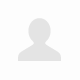
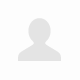

In [31]:
answer_sp = BeautifulSoup(driver.page_source, 'html.parser')
answer_sp

In [50]:
answer_num = int(answer_sp.select('h3 > em')[0].text)
answer_num

8

In [109]:
answer_list = answer_sp.select('.se-main-container')
len(answer_list)

5

In [155]:
answer_li = answer_list[0]

In [157]:
answer_li.select('.se-module')[0].get_text().strip().replace('\u200b', ' ').split(' ')

['여친선물로', '데일리로맨틱', '오르골', '무드등', '강추요', '여친선물', 'BEST입니다~^^', '후기봐보세요', '']

In [150]:
answer = []
answer_list = answer_sp.select('.se-main-container')

for answer_li in range(1,len(answer_list)+1):
    answer = []
    a = answer_li.select('.se-module')[0].get_text().replace('\u200b', ' ').split(' ')
    print(a)

AttributeError: 'int' object has no attribute 'select'

In [145]:
answer

['\u200b', '\u200b', '\u200b', '\u200b', '\u200b']

## TCH

In [158]:
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--nosandbox')
options.add_argument('--single-process')
options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver', options=options)

In [159]:
!sudo apt update

'sudo'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [164]:
from urllib import parse
from urllib.parse import quote, urlsplit

In [165]:
answer_list = []
base_url = 'https://kin.naver.com/search/list.naver?query='
url = base_url + quote('여친선물')
driver.get(url)

In [174]:
for page in range(1,11):
    print('page', page)
    url = f"{base_url}{quote('여친선물')}&page={page}"
    driver.get(url)
    time.sleep(3)

    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    lis = soup.select('ul.basic1 > li')
    
    for li in lis:
        sub_url = li.select_one('a._searchListTitleAnchor')['href']
        driver.get(sub_url)
        time.sleep(3)
        
        count = int(driver.find_element(By.CSS_SELECTOR, '._answerCount.num').text)
        answer_page = (count-1) // 5   # 페이지 넘어가는 갯수 (몫)
        print(count, answer_page)        
        
        for i in range(answer_page):
            driver.find_element(By.ID, 'nextPageButton').click()
            time.sleep(2)
        
        html = driver.page_source
        soup = BeautifulSoup(html, 'html.parser')
        divs = soup.select('div.answer-content__item _contentWrap _answer')
        len(divs)
        
        for div in divs:
            ps = div.select('p.se-text-paragraph')
            for p in ps:
                text = p.get_text()
                if text == ' ' or text == '\u200b':
                    continue
                else:
                    answer_list.append(text)
        driver.back()
        time.sleep(3)

page 1
8 1
8 1
4 0
10 1
12 2
1 0
5 0
6 1
3 0
1 0
page 2
12 2
11 2
5 0
13 2
12 2
6 1
1 0
4 0
14 2
1 0
page 3
14 2
5 0
2 0
1 0
8 1
9 1
2 0
5 0
3 0
1 0
page 4
3 0
1 0
5 0
4 0
4 0
9 1
3 0
18 3
1 0
2 0
page 5
2 0
4 0
1 0
5 0
8 1
9 1
14 2
13 2
13 2
15 2
page 6
20 3
12 2
3 0
2 0
1 0
7 1
6 1
13 2
11 2
5 0
page 7
13 2
11 2
8 1
12 2
2 0
10 1
1 0
11 2
2 0
5 0
page 8
6 1
5 0
7 1
3 0
6 1
8 1
15 2
11 2
1 0
3 0
page 9
2 0
16 3
1 0
16 3
1 0
9 1
1 0
5 0
7 1
2 0
page 10
7 1
1 0
1 0
3 0
4 0
1 0
8 1
21 4
26 5
9 1


In [175]:
with open('gf_gift.txt', 'w', encoding = 'utf-8') as f:
    for answer in answer_list:
        f.write(answer + '\n')

In [176]:
len(answer_list)

0